<a href="https://colab.research.google.com/github/Sophiii-HI/TechXplore-Hackathon-2021/blob/main/HackXplore_2021.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Importing Libraries**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

**Upload CSV**

In [ ]:
from google.colab import files
upload = files.upload()

Saving industry_weekly_2020.csv to industry_weekly_2020 (1).csv


In [208]:
df= pd.read_csv('industry_weekly_2020.csv')
df

,country_code,country,geography_code,geography,geography_type,group_code,group_name,group_type,start_date,end_date,job_postings_count,population
0,AU,Australia,NaN,Adelaide,Metropolitan Area,H,Accommodation and Food Services,Industry,2020-01-05,2020-01-11,22,1345777.0
1,AU,Australia,NaN,Adelaide,Metropolitan Area,H,Accommodation and Food Services,Industry,2020-01-12,2020-01-18,32,1345777.0
2,AU,Australia,NaN,Adelaide,Metropolitan Area,H,Accommodation and Food Services,Industry,2020-01-19,2020-01-25,27,1345777.0
3,AU,Australia,NaN,Adelaide,Metropolitan Area,H,Accommodation and Food Services,Industry,2020-01-26,2020-02-01,19,1345777.0
4,AU,Australia,NaN,Adelaide,Metropolitan Area,H,Accommodation and Food Services,Industry,2020-02-02,2020-02-08,32,1345777.0
...,...,...,...,...,...,...,...,...,...,...,...,...
153207,US,United States of America,US-WY,Wyoming,Subdivision,42,Wholesale Trade,Industry,2020-11-22,2020-11-28,1,578759.0
153208,US,United States of America,US-WY,Wyoming,Subdivision,42,Wholesale Trade,Industry,2020-12-06,2020-12-12,4,578759.0
153209,US,United States of America,US-WY,Wyoming,Subdivision,42,Wholesale Trade,Industry,2020-12-13,2020-12-19,6,578759.0
153210,US,United States of America,US-WY,Wyoming,Subdivision,42,Wholesale Trade,Industry,2020-12-20,2020-12-26,5,578759.0


In [209]:
df.columns

Index(['country_code', 'country', 'geography_code', 'geography',
       'geography_type', 'group_code', 'group_name', 'group_type',
       'start_date', 'end_date', 'job_postings_count', 'population'],
      dtype='object')

**Drop irrelevant columns**

In [210]:
df = df.drop(['geography_code', 'geography','geography_type','group_code','group_type',"country_code","population"], axis = 1)
df.columns

Index(['country', 'group_name', 'start_date', 'end_date',
       'job_postings_count'],
      dtype='object')

In [211]:
df

,country,group_name,start_date,end_date,job_postings_count
0,Australia,Accommodation and Food Services,2020-01-05,2020-01-11,22
1,Australia,Accommodation and Food Services,2020-01-12,2020-01-18,32
2,Australia,Accommodation and Food Services,2020-01-19,2020-01-25,27
3,Australia,Accommodation and Food Services,2020-01-26,2020-02-01,19
4,Australia,Accommodation and Food Services,2020-02-02,2020-02-08,32
...,...,...,...,...,...
153207,United States of America,Wholesale Trade,2020-11-22,2020-11-28,1
153208,United States of America,Wholesale Trade,2020-12-06,2020-12-12,4
153209,United States of America,Wholesale Trade,2020-12-13,2020-12-19,6
153210,United States of America,Wholesale Trade,2020-12-20,2020-12-26,5


**Select data for North America**

In [212]:
newdf = df[df["country"].str.startswith("Canada")]
newdf

,country,group_name,start_date,end_date,job_postings_count
13199,Canada,Accommodation and Food Services,2020-01-05,2020-01-11,88
13200,Canada,Accommodation and Food Services,2020-01-12,2020-01-18,75
13201,Canada,Accommodation and Food Services,2020-01-19,2020-01-25,117
13202,Canada,Accommodation and Food Services,2020-01-26,2020-02-01,126
13203,Canada,Accommodation and Food Services,2020-02-02,2020-02-08,69
...,...,...,...,...,...
30918,Canada,Wholesale Trade,2020-07-26,2020-08-01,1
30919,Canada,Wholesale Trade,2020-09-20,2020-09-26,1
30920,Canada,Wholesale Trade,2020-09-27,2020-10-03,1
30921,Canada,Wholesale Trade,2020-10-04,2020-10-10,1


**Select top 10 industries**

In [213]:
options = ['Health Care and Social Assistance', 
           'Retail Trade',
           "Accommodation and Food Services",
           "Professional, Scientific, and Technical Services",
           "Finance and Insurance",
           "Manufacturing",
           "Educational Services",
           "Information",
           "Construction",
           "Arts, Entertainment, and Recreation"] 

newdf = newdf.loc[newdf['group_name'].isin(options)]

newdf.drop(['country'], axis = 1, inplace=True)
newdf

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,group_name,start_date,end_date,job_postings_count
13199,Accommodation and Food Services,2020-01-05,2020-01-11,88
13200,Accommodation and Food Services,2020-01-12,2020-01-18,75
13201,Accommodation and Food Services,2020-01-19,2020-01-25,117
13202,Accommodation and Food Services,2020-01-26,2020-02-01,126
13203,Accommodation and Food Services,2020-02-02,2020-02-08,69
...,...,...,...,...
30855,Retail Trade,2020-11-22,2020-11-28,5
30856,Retail Trade,2020-11-29,2020-12-05,2
30857,Retail Trade,2020-12-06,2020-12-12,6
30858,Retail Trade,2020-12-13,2020-12-19,2


In [214]:
newdf['start_date'] = pd.to_datetime(newdf['start_date']) 

# add new columns for the date and months 
newdf['start_month'] = newdf['start_date'].apply(lambda date:date.month)
newdf['start_year'] = newdf['start_date'].apply(lambda date:date.year)
newdf['start_day'] = newdf['start_date'].apply(lambda date:date.day)

newdf['end_date'] = pd.to_datetime(newdf['end_date']) 

newdf['end_month'] = newdf['end_date'].apply(lambda date:date.month)
newdf['end_year'] = newdf['end_date'].apply(lambda date:date.year)
newdf['end_day'] = newdf['end_date'].apply(lambda date:date.day)


newdf



/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value in

,group_name,start_date,end_date,job_postings_count,start_month,start_year,start_day,end_month,end_year,end_day
13199,Accommodation and Food Services,2020-01-05,2020-01-11,88,1,2020,5,1,2020,11
13200,Accommodation and Food Services,2020-01-12,2020-01-18,75,1,2020,12,1,2020,18
13201,Accommodation and Food Services,2020-01-19,2020-01-25,117,1,2020,19,1,2020,25
13202,Accommodation and Food Services,2020-01-26,2020-02-01,126,1,2020,26,2,2020,1
13203,Accommodation and Food Services,2020-02-02,2020-02-08,69,2,2020,2,2,2020,8
...,...,...,...,...,...,...,...,...,...,...
30855,Retail Trade,2020-11-22,2020-11-28,5,11,2020,22,11,2020,28
30856,Retail Trade,2020-11-29,2020-12-05,2,11,2020,29,12,2020,5
30857,Retail Trade,2020-12-06,2020-12-12,6,12,2020,6,12,2020,12
30858,Retail Trade,2020-12-13,2020-12-19,2,12,2020,13,12,2020,19


In [215]:
newdf = newdf.drop(['start_date',"end_date"], axis = 1)
newdf

,group_name,job_postings_count,start_month,start_year,start_day,end_month,end_year,end_day
13199,Accommodation and Food Services,88,1,2020,5,1,2020,11
13200,Accommodation and Food Services,75,1,2020,12,1,2020,18
13201,Accommodation and Food Services,117,1,2020,19,1,2020,25
13202,Accommodation and Food Services,126,1,2020,26,2,2020,1
13203,Accommodation and Food Services,69,2,2020,2,2,2020,8
...,...,...,...,...,...,...,...,...
30855,Retail Trade,5,11,2020,22,11,2020,28
30856,Retail Trade,2,11,2020,29,12,2020,5
30857,Retail Trade,6,12,2020,6,12,2020,12
30858,Retail Trade,2,12,2020,13,12,2020,19


**Recode group name**

In [216]:


newdf.group_name[newdf.group_name =="Accommodation and Food Services"] = 1
newdf.group_name[newdf.group_name =="Health Care and Social Assistance"] = 2
newdf.group_name[newdf.group_name =="Retail Trade"] = 3
newdf.group_name[newdf.group_name =="Professional, Scientific, and Technical Services"] = 4
newdf.group_name[newdf.group_name =="Finance and Insurance"] = 5
newdf.group_name[newdf.group_name =="Manufacturing"] = 6
newdf.group_name[newdf.group_name =="Educational Services"] = 7
newdf.group_name[newdf.group_name =="Information"] = 8
newdf.group_name[newdf.group_name =="Construction"] = 9
newdf.group_name[newdf.group_name =="Arts, Entertainment, and Recreation"] = 10

newdf




/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-

,group_name,job_postings_count,start_month,start_year,start_day,end_month,end_year,end_day
13199,1,88,1,2020,5,1,2020,11
13200,1,75,1,2020,12,1,2020,18
13201,1,117,1,2020,19,1,2020,25
13202,1,126,1,2020,26,2,2020,1
13203,1,69,2,2020,2,2,2020,8
...,...,...,...,...,...,...,...,...
30855,3,5,11,2020,22,11,2020,28
30856,3,2,11,2020,29,12,2020,5
30857,3,6,12,2020,6,12,2020,12
30858,3,2,12,2020,13,12,2020,19


**Training/Test Split**

In [247]:
X = newdf.drop('job_postings_count', axis=1) # exluding the job_postings_count column that our model will predict
y = newdf['job_postings_count']

In [248]:
from sklearn.model_selection import train_test_split

In [249]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101) #try 42

**Scaling**

In [250]:
from sklearn.preprocessing import MinMaxScaler

In [251]:
scaler = MinMaxScaler()

In [252]:
X_train= scaler.fit_transform(X_train) # fit and transforming our train set simultaneously
X_test = scaler.transform(X_test)

**Creating the model**

In [253]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.optimizers import Adam

In [254]:
X_train.shape, X_test.shape

((6564, 7), (2814, 7))

In [255]:
model = Sequential()

model.add(Dense(4,activation='relu'))
model.add(Dense(4,activation='relu'))
model.add(Dense(4,activation='relu'))
model.add(Dense(4,activation='relu'))
model.add(Dense(1))

# compiling with Adam optimizer
# choosing mean-squared error as the loss metric for the regression model 
model.compile(optimizer='adam',loss='mse')  

In [256]:
model.build(X_train.shape)
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_25 (Dense)             (6564, 4)                 32        
_________________________________________________________________
dense_26 (Dense)             (6564, 4)                 20        
_________________________________________________________________
dense_27 (Dense)             (6564, 4)                 20        
_________________________________________________________________
dense_28 (Dense)             (6564, 4)                 20        
_________________________________________________________________
dense_29 (Dense)             (6564, 1)                 5         
Total params: 97
Trainable params: 97
Non-trainable params: 0
_________________________________________________________________


**Early Stopping**

In [257]:
from tensorflow.keras.callbacks import EarlyStopping

In [258]:
early_stop = EarlyStopping(monitor='val_loss',patience=2)

**Training the model**

In [260]:
model.fit(x=X_train,
          y=y_train.values,   # y_train.values instead of y_train to pass in a numpy array
          validation_data=(X_test,y_test.values),
          batch_size=128,
          epochs=400,
          callbacks=[early_stop])

Epoch 1/400
52/52 [==============================] - 0s 4ms/step - loss: 136290.5469 - val_loss: 128535.9688
Epoch 2/400
52/52 [==============================] - 0s 3ms/step - loss: 136311.4688 - val_loss: 128521.2031
Epoch 3/400
52/52 [==============================] - 0s 2ms/step - loss: 136316.5312 - val_loss: 128525.3281
Epoch 4/400
52/52 [==============================] - 0s 2ms/step - loss: 136294.1094 - val_loss: 128533.1953


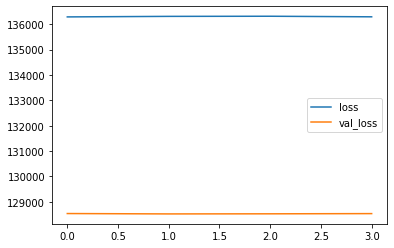

In [263]:
losses = pd.DataFrame(model.history.history)
losses.plot()

In [264]:
from sklearn.metrics import r2_score

In [265]:
predictions = model.predict(X_test)

In [266]:
print(r2_score(y_test.values, predictions))

0.04581953515751502


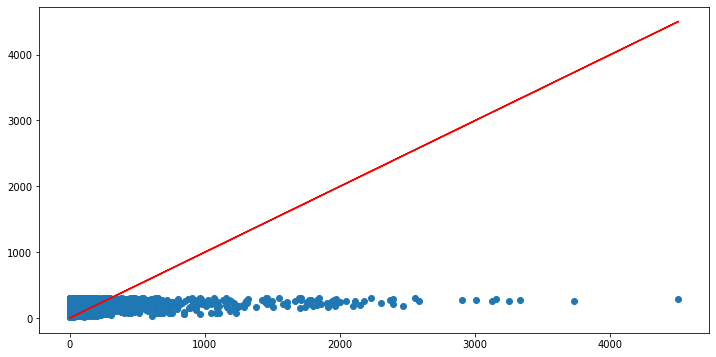

In [267]:
plt.figure(figsize=(12, 6))

# Our predictions
plt.scatter(y_test,predictions)

# Perfect predictions
plt.plot(y_test,y_test,'r')

ValueError: ignored